In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input/cremad'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np

import os 
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset


In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/cremad'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
paths[:5]

['/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav',
 '/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav',
 '/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav',
 '/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav',
 '/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav']

In [5]:
labels[:5]

['xx', 'lo', 'xx', 'xx', 'xx']

In [6]:
##creat a dataframe
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav,xx
1,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav,lo
2,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav,xx
3,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav,xx
4,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav,xx


In [7]:
df['label'].value_counts()

xx    6076
lo     455
hi     455
md     455
x        1
Name: label, dtype: int64

## Explratory Data Analysis

Text(0.5, 1.0, 'count of Emotions')

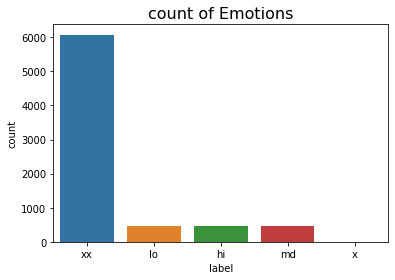

In [8]:
sns.countplot(df['label'])
plt.title('count of Emotions',size=16)

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

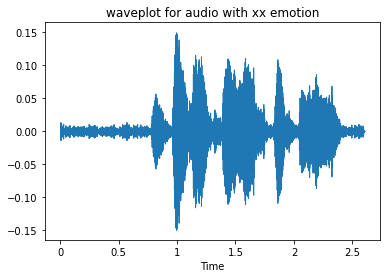

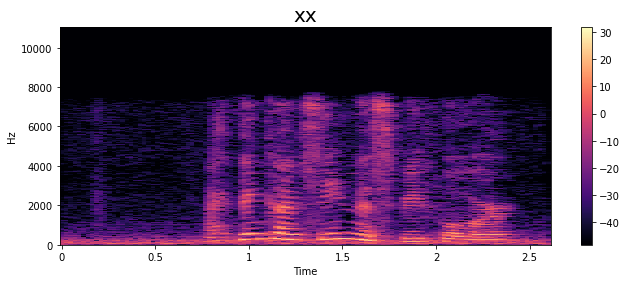

In [10]:
emotion = 'xx'
#path = np.array(datapath.path[datapath.Emotions==emotion])[1]
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
plt.title('waveplot for audio with xx emotion')
spectogram(data, sampling_rate, emotion)
Audio(path)

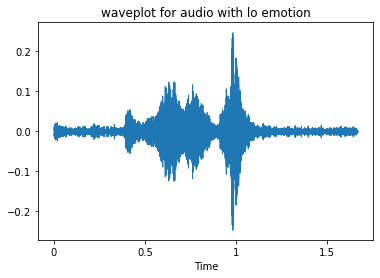

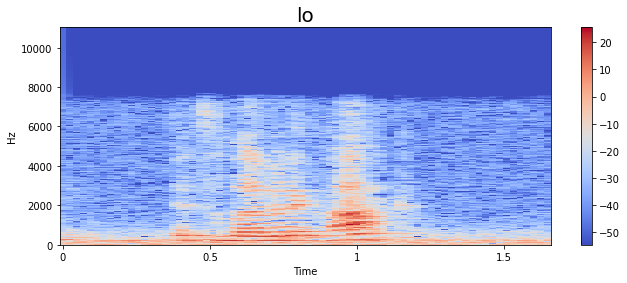

In [11]:
emotion = 'lo'
#path = np.array(datapath.path[datapath.Emotions==emotion])[1]
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
plt.title('waveplot for audio with lo emotion')
spectogram(data, sampling_rate, emotion)
Audio(path)

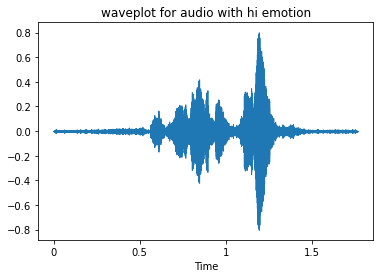

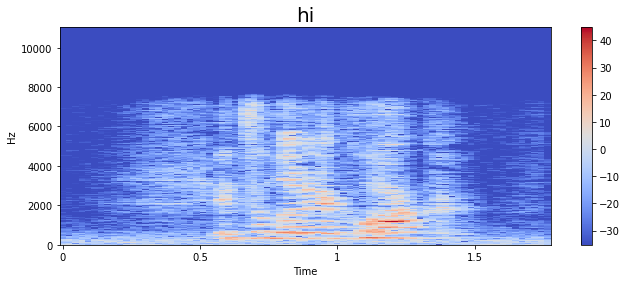

In [12]:
emotion = 'hi'
#path = np.array(datapath.path[datapath.Emotions==emotion])[1]
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
plt.title('waveplot for audio with hi emotion')
spectogram(data, sampling_rate, emotion)
Audio(path)

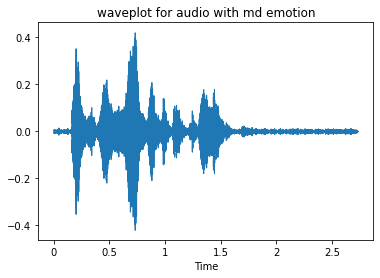

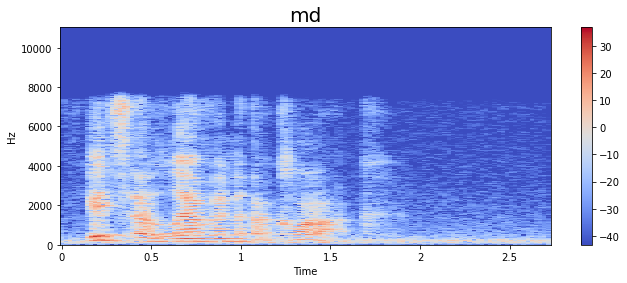

In [13]:
emotion = 'md'
#path = np.array(datapath.path[datapath.Emotions==emotion])[1]
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
plt.title('waveplot for audio with md emotion')
spectogram(data, sampling_rate, emotion)
Audio(path)

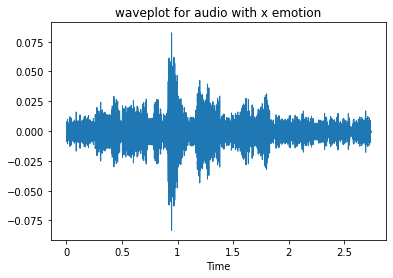

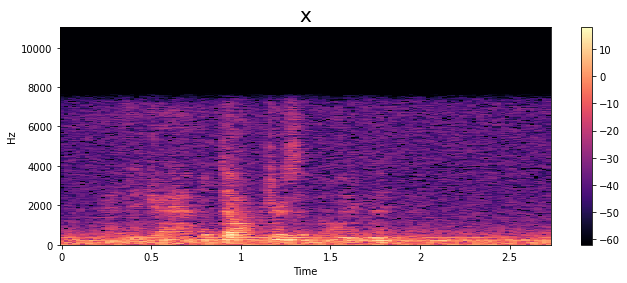

In [14]:
emotion = 'x'
#path = np.array(datapath.path[datapath.Emotions==emotion])[1]
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
plt.title('waveplot for audio with x emotion')
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [15]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [16]:
extract_mfcc(df['speech'][0])

array([-417.35895   ,  132.382     ,    2.4006617 ,   78.04398   ,
        -19.31998   ,   42.539383  ,  -32.195377  ,   13.095595  ,
        -14.264867  ,    1.9254175 ,    3.2700737 ,  -13.85477   ,
         12.995992  ,  -11.491112  ,    6.0086465 ,  -14.881661  ,
          6.056325  ,   -8.359356  ,   -4.505984  ,   -1.7885164 ,
         -6.0571833 ,    2.3654811 ,   -5.305844  ,    6.7311263 ,
         -5.7584066 ,    8.108384  ,   -2.8086221 ,    1.3844408 ,
          0.92159927,   -2.4207826 ,    3.3172414 ,   -3.069399  ,
          6.906844  ,   -0.7901824 ,    3.164639  ,   -0.6097331 ,
          1.8477236 ,   -1.8909087 ,   -0.93124324,    2.876079  ],
      dtype=float32)

In [17]:
import numpy as np 
import pandas as pd
df = pd.DataFrame()
df['speech']=paths
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [18]:
X_mfcc

0       [-417.35895, 132.382, 2.4006617, 78.04398, -19...
1       [-433.85382, 149.05438, 6.2608333, 46.211414, ...
2       [-393.7493, 123.30472, 1.5972062, 54.519703, -...
3       [-363.82336, 128.48691, 24.700167, 45.76028, -...
4       [-386.76962, 142.57219, 1.6107662, 48.687588, ...
                              ...                        
7437    [-364.92407, 156.80432, -19.348293, 38.12735, ...
7438    [-314.7225, 126.098076, 13.071459, 28.14552, -...
7439    [-332.38492, 144.40419, 7.129773, 46.78081, 2....
7440    [-428.1361, 160.16629, 6.6636133, 54.2585, -21...
7441    [-445.43277, 134.0681, 7.9255314, 67.88747, -7...
Name: speech, Length: 7442, dtype: object

In [19]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [20]:
## input split
X = np.expand_dims(X, -1)
X.shape

(7442, 40, 1)

In [21]:
from sklearn.preprocessing import OneHotEncoder
df['label']=labels
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [23]:
y.shape

(7442, 5)

## Create the LSTM Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 123)               61500     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                7936      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 165       
Total params: 71,681
Trainable params: 71,681
Non-trainable params: 0
__________________________________________________

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

**Plot the results**


In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()